In [1]:
import numpy as np
import matplotlib.pylab as plt

Empezamos cargando los datos con la función **loadtxt()** de la librería **numpy**. Concretamente vamos a cargar las columnas 8, 9 y 10 del dataset. Estas corresponden a las columnas del código del país, el año y el gasto público respectivamente. Notemos que para cargar las columnas 9 y la 10 no hay problema, ya que son datos numéricos. Pero para cargar el código del país no lo podemos hacer directamente, ya que es texto. Debemos utilizar el mismo procedimiento que el que hemos realizado en el análisis del dataset B. Es decir, transformaremos los bytes leídos por la función a un número entero con la función **from_bytes()**.

In [2]:
data = np.loadtxt("../datos/datosC.csv", 
                  delimiter = ",", 
                  usecols = (7, 8, 9), 
                  skiprows = 1, 
                  converters = {7: lambda s: int.from_bytes(s, byteorder = "big")})

Ahora el objetivo será tener un mapping del código del país a su representación en formato texto. Para ello primero obtenemos todos los códigos que tenemos con la función **unique()**.

In [3]:
codigos = np.unique(data[:,0])
print(codigos)

[1.67240000e+04 1.69650000e+04 1.69670000e+04 1.72410000e+04
 1.72420000e+04 1.74770000e+04 1.74830000e+04 1.77330000e+04
 1.77400000e+04 1.77470000e+04 1.79930000e+04 1.80020000e+04
 1.85140000e+04 1.85170000e+04 1.87570000e+04 1.87710000e+04
 1.87720000e+04 1.95400000e+04 1.95410000e+04 1.95420000e+04
 1.97960000e+04 2.00440000e+04 2.00470000e+04 2.05560000e+04
 2.05640000e+04 2.10710000e+04 2.13170000e+04 2.13210000e+04
 2.13230000e+04 1.16190034e+09 1.27896437e+21]


Fijémonos que los dos últimos códigos son números muy grandes. Eso quiere decir que el código textual del país era más largo. Por tanto, para poder transformar esos códigos a texto, necesitaremos utilizar una cantidad diferente de bytes para cada país. Si nos fijamos para la mayoría bastará con 2 bytes, pero para los dos últimos no será así.

Por tanto definimos una función que dado un código de un país, devuelva su representación textual. Fijémonos que dentro de la función definimos una variable **order** que define la cantidad de bytes que necesitaremos. Con un bucle **while** y con el bloque de código **try-catch** podemos ir aumentando secuencialmente la cantidad de bytes que necesitamos hasta que no salte ninguna excepción y se descodifique el texto de manera correcta.

In [4]:
def get_text(code):
    order = 2
    while True:
        try:
            return int(code).to_bytes(length = order, byteorder = "big").decode()
        except:
            order += 1

A continuación aplicamos la función definida sobre todos los códigos de los paises con la función **map()**

In [5]:
paises = list(map(get_text, codigos))
print(paises)

['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'EA19', 'EU27_20\x00\x00']


Fijémonos que el último país no se ha descodificado correctamente. Eso es debido a que la cantidad de bytes utilizada para descodificar el texto era más de la que se necesitaba (aunque con una cantidad menor fijémonos que no era suficiente porque de lo contrario no habría saltado ninguna excepción).

Vamos a arreglar el código textual del último país utilizando la función **split()** de la clase **str**.

In [6]:
paises[len(paises)-1] = paises[len(paises)-1].split("_")[0]
print(paises)

['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'EA19', 'EU27']


Ahora definimos un diccionario de python con el código numérico del país y su código textual:

In [7]:
mapping = {}

for i in range(len(codigos)):
    mapping[codigos[i]] = paises[i]

print(mapping)

{16724.0: 'AT', 16965.0: 'BE', 16967.0: 'BG', 17241.0: 'CY', 17242.0: 'CZ', 17477.0: 'DE', 17483.0: 'DK', 17733.0: 'EE', 17740.0: 'EL', 17747.0: 'ES', 17993.0: 'FI', 18002.0: 'FR', 18514.0: 'HR', 18517.0: 'HU', 18757.0: 'IE', 18771.0: 'IS', 18772.0: 'IT', 19540.0: 'LT', 19541.0: 'LU', 19542.0: 'LV', 19796.0: 'MT', 20044.0: 'NL', 20047.0: 'NO', 20556.0: 'PL', 20564.0: 'PT', 21071.0: 'RO', 21317.0: 'SE', 21321.0: 'SI', 21323.0: 'SK', 1161900345.0: 'EA19', 1.278964371210022e+21: 'EU27'}


Antes de realizar ningún análisis estadística, sería buena idea ver si hay algún país que tenga más información que el resto. Es decir, vamos a comprobar si todos los países tienen el mismo número de observaciones.

Podemos hacerlo gráficamente, simplemente debemos dibujar con la función **plot()** la frecuencia de todos los países. Para obtener la frecuencia podemos utilizar la función **unique()** con el parámetro **return_counts = True**.

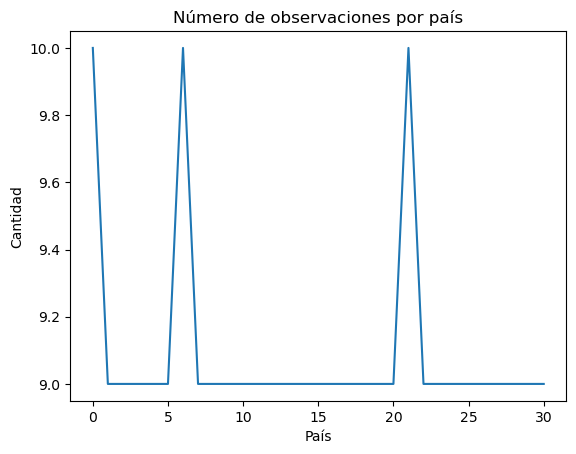

In [8]:
fig, ax = plt.subplots()
plt.title("Número de observaciones por país")
plt.ylabel("Cantidad")
plt.xlabel("País")
ax.plot(np.unique(data[:,0], return_counts = True)[1])

Vemos que hay tres países que tienen una observación más que el resto. Es decir, todos los países tienen informacións sobre el gasto público de 9 años. Pero hay tres países que tiene el gasto público de un año adicional. Veamos a qué paises corresponden.

Para determinar a qué países corresponden primero encontramos la frecuencia de aparición de cada país con la función **unique()** y el parámetro **return_counts = True**. A continuación con la función **where()** podemos determinar los códigos de los paises que tienen mayor frecuencia. Y, con el uso del diccionario, sabremos los códigos textuales de los países.

In [9]:
_, frecuencia = np.unique(data[:,0], return_counts = True)
cod = codigos[np.where(frecuencia == np.max(frecuencia))[0]]
for c in cod:
    print(mapping[c])

AT
DK
NL


Vemos que los paises AT, DK y NL tienen información sobre el gasto público de un año más que el resto de paises. ¿Qué año es? Para responder esa pregunta guardaremos los años correspondientes a uno de los paises que tienen una observación más. Luego encontraremos los años de un país que no es de los que tienen una observación más. Para logar esto último usaremos un bucle **for**. Y, en la primera iteración de un código de país que no sea ninguno de los tres países que tienen una observación más, guardaremos ese código en una variable y forzaremos la salida del bucle. Finalmente para determinar el año adicional que no tienen el resto de paises utilizaremos las operaciones de conjuntos con Python. Para ello convertimos los dos arrays de años al tipo de dato **set** y realizamos su diferencia.

In [10]:
# Array con los años de los paises con una observación más
años_cod = data[np.where(data[:,0] == cod[0]), 1][0]

# Encontramos el primer código de un país que no es de los tres paises con una observación más
otro = 0
for codigo in codigos:
    if codigo not in cod:
        otro = codigo
        break
# Encontramos el año extra que tenemos
print(set(años_cod)-set(data[np.where(data[:,0] == otro), 1][0]))

{2021.0}


El año 2021 no está en el resto de países. Solamente en los países AT, DK y NL

Vamos a encontrar para cada país la media y la desviación estándar del gasto público. Para ello usaremos el bucle **for**. Y, en cada iteración, guardaremos los datos del gasto público de cada país para posteriormente calcular la media y la desviación estándar.

In [11]:
for pais in codigos:
    datos_pais = data[np.where(data[:,0] == pais)]
    print(f'La media del país {mapping[pais]} es: {np.mean(datos_pais[:,2])} y su desviación estándar es: {np.std(datos_pais[:,2])}')

La media del país AT es: 51.58 y su desviación estándar es: 2.6607517734655377
La media del país BE es: 54.46666666666667 y su desviación estándar es: 2.3870018386624214
La media del país BG es: 37.72222222222222 y su desviación estándar es: 3.13077121410392
La media del país CY es: 41.71111111111111 y su desviación estándar es: 3.8088914819127697
La media del país CZ es: 42.17777777777778 y su desviación estándar es: 2.3924779240954255
La media del país DE es: 45.21111111111111 y su desviación estándar es: 2.00135756394639
La media del país DK es: 53.1 y su desviación estándar es: 2.6183964558485027
La media del país EE es: 39.79999999999999 y su desviación estándar es: 2.2226110770892866
La media del país EL es: 53.211111111111116 y su desviación estándar es: 5.144456443470527
La media del país ES es: 44.8111111111111 y su desviación estándar es: 3.5037898352892887
La media del país FI es: 55.47777777777778 y su desviación estándar es: 1.6067757762244639
La media del país FR es: 57.1

A continaución calculamos el mínimo y el máximo del gasto público en cada año. Y, también proporcionamos el país al que corresponde ese máximo y mínimo. El proceso para obtener este resultado es parecido al anterior. Primero obtenemos todos los años sobre los que tenemos información con la función **unique()**. Luego usaremos un bucle **for** donde cada iteración representa un año diferente. En cada iteración, obtenemos la información de todos los paises de ese año y luego calculamos el máximo y el mínimo. Para saber qué país tiene ese máximo o mínimo usamos la función **where()** para buscar la fila donde se encuentra el máximo o mínimo. Y, de esa fila, seleccionamos el código del país.

In [12]:
años = np.unique(data[:,1])
for año in años:
    datos_año = data[np.where(data[:,1] == año)]
    maximo = np.max(datos_año[:,2])
    minimo = np.min(datos_año[:,2])
    print(f'El máximo del año {int(año)} es: {maximo} y corresponde al país {mapping[datos_año[np.where(datos_año[:,2] == maximo)][0,0]]}')
    print(f'El mínimo del año {int(año)} es: {minimo} y corresponde al país {mapping[datos_año[np.where(datos_año[:,2] == minimo)][0,0]]}')

El máximo del año 2012 es: 58.0 y corresponde al país DK
El mínimo del año 2012 es: 34.3 y corresponde al país BG
El máximo del año 2013 es: 62.8 y corresponde al país EL
El mínimo del año 2013 es: 35.6 y corresponde al país LT
El máximo del año 2014 es: 57.3 y corresponde al país FI
El mínimo del año 2014 es: 34.7 y corresponde al país LT
El máximo del año 2015 es: 56.8 y corresponde al país FR
El mínimo del año 2015 es: 29.1 y corresponde al país IE
El máximo del año 2016 es: 56.7 y corresponde al país FR
El mínimo del año 2016 es: 28.1 y corresponde al país IE
El máximo del año 2017 es: 56.5 y corresponde al país FR
El mínimo del año 2017 es: 26.2 y corresponde al país IE
El máximo del año 2018 es: 55.6 y corresponde al país FR
El mínimo del año 2018 es: 25.3 y corresponde al país IE
El máximo del año 2019 es: 55.4 y corresponde al país FR
El mínimo del año 2019 es: 24.2 y corresponde al país IE
El máximo del año 2020 es: 61.6 y corresponde al país FR
El mínimo del año 2020 es: 27.4

Seguidamente calculamos la media y la desviacióne estándar del gasto público por años. El procedimiento es análogo a los anteriores: Usamos un bucle **for** para iterar sobre todos los años, encontramos la información de todos los países de ese año, y calculamos la media y la desviación estándar.

In [13]:
for año in años:
    datos_año = data[np.where(data[:,1] == año)]
    print(f'La media del año {int(año)} es: {np.mean(datos_año[:,2])} y su desviación estándar es: {np.std(datos_año[:,2])}')

La media del año 2012 es: 46.645161290322584 y su desviación estándar es: 6.334994396701823
La media del año 2013 es: 47.067741935483866 y su desviación estándar es: 7.090629304469576
La media del año 2014 es: 46.564516129032256 y su desviación estándar es: 6.148933733273719
La media del año 2015 es: 45.53225806451613 y su desviación estándar es: 6.5464290732293176
La media del año 2016 es: 44.232258064516124 y su desviación estándar es: 6.755136019583924
La media del año 2017 es: 43.34516129032257 y su desviación estándar es: 6.729177618817796
La media del año 2018 es: 43.6 y su desviación estándar es: 6.272932122967283
La media del año 2019 es: 43.493548387096766 y su desviación estándar es: 6.384605248810812
La media del año 2020 es: 50.09354838709677 y su desviación estándar es: 6.851415464016316
La media del año 2021 es: 51.13333333333333 y su desviación estándar es: 3.8447655614123235


A continuación vamos a dibujar la mediana del gasto público de los países con la función **plot()**. Para ello primero guardaremos en un array la mediana del gasto público de cada país. El proceso para obtener la mediana del gasto público de cada país ya lo hemos explicado varias veces. Luego, simplemente dibujamos el array con las funcionalidades de la librería matplotlib.

In [14]:
mediana_paises = np.zeros(len(codigos))
for i in range(len(codigos)):
    datos_id = data[np.where(data[:,0] == codigos[i])]
    mediana_paises[i] = np.median(datos_id[:,2])

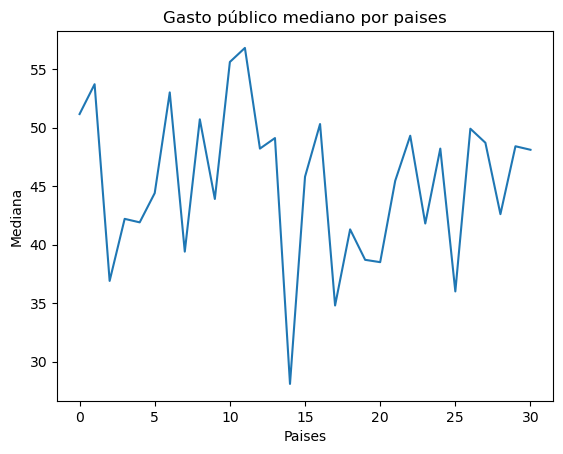

In [15]:
fig, ax = plt.subplots()
plt.title("Gasto público mediano por paises")
plt.ylabel("Mediana")
plt.xlabel("Paises")
ax.plot(mediana_paises)

Hay una variación moderada del gasto público mediano entre los diferentes países. Aunque todos están acotados entre 30 y 60 (aproximadamente).

Finalmente, también sería interesante ver como aumenta el tercer cuantil del gasto público de los países con los años. Vamos a dibnujarlo gráficamente con la función **plot()**. Primero guardaremos en un array el tercer cuantil del gasto público de cada año. El proceso es idéntico al anterior, solamenente necesitamos utilizar la función **percentile()** de numpy para calcular cualquier percentil. En particular nos interesa el tercer cuantil, por lo que debemos indicarle el parámetro 75 para obtener lo deseado.

In [16]:
cuantil_años = np.zeros(len(años))
for i in range(len(años)):
    datos_año = data[np.where(data[:,1] == años[i])]
    cuantil_años[i] = np.percentile(datos_año[:,2], 75)

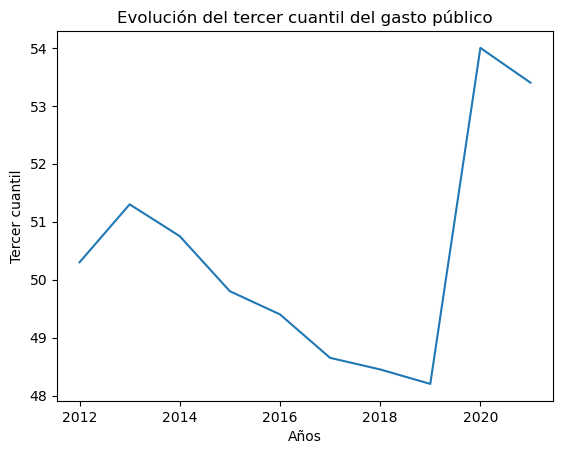

In [17]:
fig, ax = plt.subplots()
plt.title("Evolución del tercer cuantil del gasto público")
plt.ylabel("Tercer cuantil")
plt.xlabel("Años")
ax.plot(años, cuantil_años)

Vemos que el gasto públic disminuyó suavemente entre los años 2013 y 2019. Pero vemos un aumento muy significativo del gasto público en el año 2020, debido probablemente a la pandemia. Cabe destacar que el último año, el 2021, tan solo tenemos tres observaciones, por lo que no es muy fiable como extrapolación del gasto público en el resto de países. Aunque es esperable que sea parecido al gasto del año 2020 por motivos otra vez de la pandemia.